# Qiskit Runtime to evaluate QDCA via simulation and hardware

In [18]:
import glob
import json
import networkx as nx
import numpy as np
import qiskit
import pickle
import matplotlib.pyplot as plt

import qcopt

from qiskit import qpy

from qiskit_ibm_runtime import QiskitRuntimeService, Options
from qiskit_ibm_runtime.options import TranspilationOptions, SimulatorOptions

import remote_runtime, runtime_helpers, my_noise_models

from circuit_knitting_toolbox.circuit_cutting.wire_cutting import verify, wire_cutting

In [112]:
from matplotlib import rcParams
rcParams["font.family"] = "Times New Roman"
#rcParams['font.family'] = 'sans-serif'
#rcParams['font.sans-serif'] = ['Tahoma']

In [2]:
service = QiskitRuntimeService(channel="ibm_cloud")
print(service.backends())
print(service.programs())

[<IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_statevector')>]
[<RuntimeProgram('hello-world-89yvgl6jG5')>, <RuntimeProgram('hello-world')>, <RuntimeProgram('sampler')>, <RuntimeProgram('estimator')>]


# Test circuit-knitting functionality

## Get the QDCA circuit

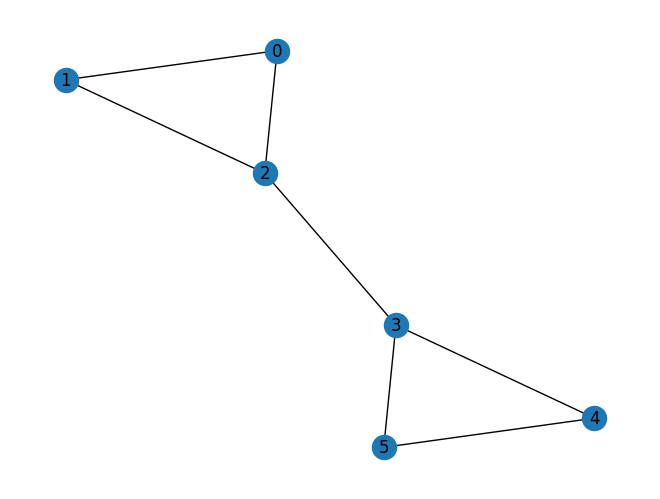

In [39]:
#G = nx.Graph()
#G.add_edges_from([(0,1), (1,2), (0,2), (2,3), (3,4), (4,5), (3,5)])
#target_graph = (
#    "/Users/teague/Workspace/dqva-and-circuit-cutting/"
#    "benchmark_graphs/N18_com2_pin20_pout2_graphs/G10.txt"
#)
#G = qcopt.graph_funcs.graph_from_file(target_graph)
target_graph = 'custom_barbell'
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (0,2), (2,3), (3,4), (4,5), (3,5)])
nx.draw_spring(G, with_labels=True)

In [40]:
max_cuts = 1
params = None

circuit, subgraph_dict, cut_nodes, hot_nodes, active_mixers = runtime_helpers.get_circuit_from_graph(
    G,
    max_cuts,
    params,
    barriers=0,
    decompose_level=2
)
print(subgraph_dict)
print(active_mixers)
print(cut_nodes)
print(hot_nodes)
print(circuit.count_ops())
circuit = qiskit.compiler.transpile(circuit, optimization_level=3)
print(circuit.count_ops())
circuit.draw(fold=-1)

{0: 0, 1: 0, 2: 0, 3: 1, 4: 1, 5: 1}
[0, 1, 4, 5, 3]
[2, 3]
[3]
OrderedDict([('cx', 76), ('u1', 72), ('u3', 62), ('u2', 20)])
OrderedDict([('cx', 76), ('u3', 58), ('u1', 51), ('u2', 9)])


┌─────────┐   ┌─────────────────┐   ┌─────────┐    ┌───┐┌──────────┐┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────────────┐┌──────────────────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────────────┐                                                                                                                                                  ┌─────────┐                                                                                                                                ┌───────────┐   ┌───────────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
q_0: ──┤ U1(π/2) ├───┤ U3(theta_1,0,0) ├───┤ U2(0,π) ├────┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,0,-3π/4) ├┤ U3(-theta_1,0,0) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,π/2,π/4) ├──────────────────────────────────────────────────────────────────────────────────■────────────────────────────────■───────────────────────■──────┤ U1(π/2) ├──────────────────■─────────────────────■────────────────────────────────■──────────────────────────■─────────────────────■─────┤ U3(π,0,π) ├───┤ U1(2*theta_0) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ┌┴─────────┴┐  └─────────────────┘   └─────────┘    └─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────────────┘└───┬─────────┬────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────────────┘                 ┌──────────────┐┌─────────────────┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────────────┐  │  ┌───┴─────────┴────┐┌─────────┐  │  ┌───┐┌──────────┐┌─┴─┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌────────────────────┐  │  ┌───────────────┐  │     └───────────┘   └───────────────┘                                                                                                                                                                                                                                                                      

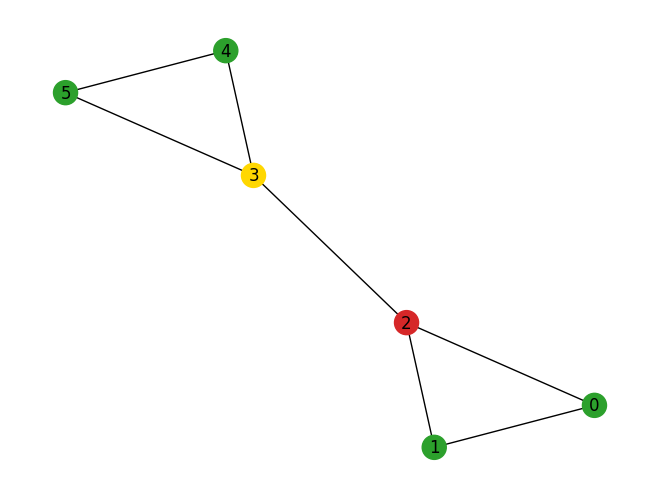

In [41]:
node_color = ['tab:green' if node in active_mixers else 'tab:red' for node in sorted(G.nodes)]
for node in hot_nodes:
    node_color[node] = 'gold'
nx.draw_spring(G, with_labels=True, node_color=[node_color[node] for node in G.nodes])

### Get optimal angles

In [42]:
out = runtime_helpers.optimize_circuit(circuit)
print(out)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.9999996999999996
       x: [ 2.937e+00  4.011e+00  7.854e+00  4.713e+00  2.462e+00
            4.098e+00]
    nfev: 83
   maxcv: 0.0


In [43]:
out.x

array([2.93650714, 4.01065201, 7.85419443, 4.7131531 , 2.46178057,
       4.09797689])

In [44]:
circuit = circuit.bind_parameters(out.x)

## Compile to `ibm_algiers`

In [45]:
algiers_service = QiskitRuntimeService(channel="ibm_cloud",
                               instance="crn:v1:bluemix:public:quantum-computing:us-east:a/37803d76ada74566b6f0114bd5964846:d9a0fc42-0d7f-4bbf-9320-dff97f3c8ed8::")
print(algiers_service.backends())
print(algiers_service.programs())
algiers_backend = algiers_service.get_backend("ibm_algiers")
config = algiers_backend.configuration()
print("This backend is called {0}, and is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates))

[<IBMBackend('ibm_algiers')>, <IBMBackend('ibm_canberra')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_statevector')>]
[<RuntimeProgram('hello-world')>, <RuntimeProgram('sampler')>, <RuntimeProgram('estimator')>]
This backend is called ibm_algiers, and is on version 1.5.10. It has 27 qubits. It supports OpenPulse programs. The basis gates supported on this device are ['cx', 'id', 'rz', 'sx', 'x'].


In [46]:
print(circuit.count_ops())
circuit.draw(fold=-1)

OrderedDict([('cx', 76), ('u3', 58), ('u1', 51), ('u2', 9)])


┌─────────┐   ┌──────────────────────────┐   ┌─────────┐    ┌───┐┌──────────┐┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────────────┐┌───────────────────────────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────────────┐                                                                                                                                                                ┌─────────┐                                                                                                                                           ┌───────────┐   ┌──────────────────────┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
q_0: ──┤ U1(π/2) ├───┤ U3(4.01065201330283,0,0) ├───┤ U2(0,π) ├────┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,0,-3π/4) ├┤ U3(-4.01065201330283,0,0) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,π/2,π/4) ├───────────────────────────────────────────────────────────────────────────────────────────■────────────────────────────────■───────────────────────■───────────┤ U1(π/2) ├──────────────────────■─────────────────────■────────────────────────────────■──────────────────────────■────────────────────────────■─────┤ U3(π,0,π) ├───┤ U1(5.87301427392299) ├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      ┌┴─────────┴┐  └──────────────────────────┘   └─────────┘    └─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────────────┘└────────┬─────────┬────────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────────────┘                 ┌──────────────┐┌──────────────────────────┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────────────┐  │  ┌────────┴─────────┴────────┐┌─────────┐  │  ┌───┐┌──────────┐┌─┴─┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌────────────────────┐  │  ┌──────────────────────┐  │     └───────────┘   └───

## Cut the circuit

In [47]:
from circuit_knitting_toolbox.circuit_cutting.wire_cutting import cut_circuit_wires, wire_cutting

In [48]:
# This is copied from `remote_runtime.py`
# The subcircuit qubit information is contained in the subgraph dict
def parse_gate_info(gate_info):
    qubits = []
    for substr in gate_info.split('['):
        if ']' in substr:
            qubits.append(int(substr.split(']')[0]))
    return qubits

stripped_circ = wire_cutting._circuit_stripping(circuit=circuit)
_, _, _, id_vertices = wire_cutting._read_circuit(circuit=stripped_circ)

# Hardcoded to 2 subcircuits only
qdca_subcircuit_2q_gates = [[], []]
for vertex_id, gate_info in id_vertices.items():
    for qubit in parse_gate_info(gate_info):
        if qubit not in cut_nodes:
            subcircuit_id = subgraph_dict[qubit]
            break
    qdca_subcircuit_2q_gates[subcircuit_id].append(vertex_id)

In [49]:
cuts = cut_circuit_wires(
    circuit=circuit,
    method="manual",
    subcircuit_vertices=qdca_subcircuit_2q_gates,
)

--------------------
subcircuit 0
ρ qubits = 0, O qubits = 1, width = 3, effective = 2, depth = 48, size = 66
      ┌─────────┐ ┌──────────────────────────┐┌─────────┐┌───┐┌──────────┐┌───┐»
q_0: ─┤ U1(π/2) ├─┤ U3(4.01065201330283,0,0) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├»
     ┌┴─────────┴┐└──────────────────────────┘└─────────┘└─┬─┘└──────────┘└─┬─┘»
q_1: ┤ U3(π,0,π) ├─────────────────────────────────────────┼────────────────■──»
     ├───────────┤                                         │                   »
q_2: ┤ U3(π,0,π) ├─────────────────────────────────────────■───────────────────»
     └───────────┘                                                             »
«     ┌─────────┐┌───┐┌──────────┐┌───┐┌─────────────────┐»
«q_0: ┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,0,-3π/4) ├»
«     └─────────┘└─┬─┘└──────────┘└─┬─┘└─────────────────┘»
«q_1: ─────────────┼────────────────■───────────■─────────»
«                  │  ┌─────────┐             ┌─┴─┐       »
«q_2: ─────────────■──┤

In [50]:
cuts['subcircuits'][0].draw(fold=-1)

┌─────────┐ ┌──────────────────────────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────────────┐┌───────────────────────────┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────┐┌───┐┌──────────┐┌───┐┌─────────────────┐                                                                                                                                                                ┌─────────┐                                                                                                                                           ┌───────────┐   ┌──────────────────────┐
q_0: ─┤ U1(π/2) ├─┤ U3(4.01065201330283,0,0) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,0,-3π/4) ├┤ U3(-4.01065201330283,0,0) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,π/2,π/4) ├───────────────────────────────────────────────────────────────────────────────────────────■────────────────────────────────■───────────────────────■───────────┤ U1(π/2) ├──────────────────────■─────────────────────■────────────────────────────────■──────────────────────────■────────────────────────────■─────┤ U3(π,0,π) ├───┤ U1(5.87301427392299) ├
     ┌┴─────────┴┐└──────────────────────────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────────────┘└────────┬─────────┬────────┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────┘└─┬─┘└──────────┘└─┬─┘└─────────────────┘                 ┌──────────────┐┌──────────────────────────┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────────────┐  │  ┌────────┴─────────┴────────┐┌─────────┐  │  ┌───┐┌──────────┐┌─┴─┐┌─────────┐┌───┐┌──────────┐┌─┴─┐┌────────────────────┐  │  ┌──────────────────────┐  │     └───────────┘   └──────────────────────┘
q_1: ┤ U3(π,0,π) ├─────────────────────────────────────────┼────────────────■───────────────┼────────────────■───────────■──────────────────┤ U1(π/2) ├──────────────■───────┼────────────────■───────────────┼────────────────■───────────■───────────────────────■──┤ U3(π,π/2,-π) ├┤ U3(7.85419442501548,0,0) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,0,-3π/4) ├──┼──┤ U3(-7.85419442501548,0,0) ├┤ U2(0,π) ├──┼──┤ X ├┤ U1(-π/4) ├┤ X ├┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,-π/2,-3π/4) ├──┼──┤ U1(5.87301427392299) ├──┼─────────────────────────────────────────────
     ├───────────┤                                         │                                │  ┌─────────┐             ┌─┴─┐                ├─────────┴┐           ┌─┴─┐     │                                │  ┌─────────┐             ┌─┴─┐       ┌──────────┐┌─┴─┐└──────────────┘└──────────────────────────┘└─────────┘└─┬─┘└──────────┘└───┘└─────────┘└─┬─┘├─────────┬┘└───┘└─────────────────┘┌─┴─┐└────────┬──────────┬───────┘└─────────┘┌─┴─┐└─┬─┘└──────────┘└───┘└─────────┘└─┬─┘├─────────┬┘└───┘└────────────────────┘┌─┴─┐└─────┬──────────┬─────┘┌─┴─┐┌─────────────────┐                        
q_2: ┤ U3(π,0,π) ├─────────────────────────────────────────■────────────────────────────────■──┤ U1(π/4) ├─────────────┤ X ├────────────────┤ U1(-π/4) ├───────────┤ X ├─────■────────────────────────────────■──┤ U1(π/4) ├─────────────┤ X ├───────┤ U1(-π/4) ├┤ X ├─────────────────────────────────────────────────────────■────────────────────────────────■──┤ U1(π/4) ├─────────────────────────┤ X ├─────────┤ U1(-π/4) ├───────────────────┤ X ├──■────────────────────────────────■──┤ U1(π/4) ├────────────────────────────┤ X ├──────┤ U1(-π/4) ├──────┤ X ├┤ U3(0,5π/8,-π/2) ├────────────────────────
     └───────────┘                                                                             └─────────┘             └───┘                └──────────┘           └───┘                                         └─────────┘             └───┘       └──────────┘└───┘                                                                                             └─────────┘                         └───┘         └──────────┘             

## Evalute subcircuits

In [51]:
from circuit_knitting_toolbox.circuit_cutting.wire_cutting import evaluate_subcircuits

In [52]:
shots = 2000

In [53]:
transpile_options = TranspilationOptions(layout_method='sabre', routing_method='sabre')
simulator_options = SimulatorOptions(
    noise_model=my_noise_models.get_pauli_noise_func(p_Xerr=0.001, p_Zerr=0.001, p_Yerr=0.001),
    coupling_map=config.coupling_map,
    basis_gates=config.basis_gates,
)
algiers_options = Options(
    execution={"shots":shots},
    optimization_level=3,
    transpilation=transpile_options,
    simulator=simulator_options
)

In [54]:
subcircuit_instance_probabilities = evaluate_subcircuits(
    cuts,
    service=service,
    backend_names=['ibmq_qasm_simulator', 'ibmq_qasm_simulator'],
    options=algiers_options,
)

In [56]:
subcircuit_instance_probabilities

{0: {0: array([0.0735, 0.483 , 0.362 , 0.0815]),
  3: array([-0.0435, -0.444 , -0.351 , -0.0675]),
  1: array([-0.0135,  0.015 , -0.016 , -0.0055]),
  2: array([ 0.004 , -0.0195, -0.0155, -0.001 ])},
 1: {0: array([0.008 , 0.1805, 0.008 , 0.087 , 0.0025, 0.274 , 0.0015, 0.029 ,
         0.0045, 0.272 , 0.    , 0.0465, 0.001 , 0.063 , 0.001 , 0.0215]),
  1: array([0.0815, 0.006 , 0.535 , 0.0075, 0.0615, 0.0055, 0.067 , 0.0025,
         0.083 , 0.007 , 0.0835, 0.001 , 0.032 , 0.002 , 0.0235, 0.0015]),
  2: array([0.0375, 0.093 , 0.274 , 0.051 , 0.0395, 0.1375, 0.031 , 0.016 ,
         0.0445, 0.137 , 0.043 , 0.024 , 0.014 , 0.031 , 0.013 , 0.014 ]),
  3: array([0.0445, 0.093 , 0.265 , 0.0435, 0.0365, 0.134 , 0.0425, 0.019 ,
         0.04  , 0.1485, 0.0405, 0.02  , 0.0125, 0.0275, 0.0205, 0.0125])}}

## Recombine

In [19]:
from circuit_knitting_toolbox.circuit_cutting.wire_cutting import reconstruct_full_distribution

In [20]:
temp_reconstructed_probabilities = reconstruct_full_distribution(
    circuit,
    subcircuit_instance_probabilities,
    cuts,
    num_threads=2,
)

## Verify correctness

In [21]:
from circuit_knitting_toolbox.circuit_cutting.wire_cutting import verify

In [22]:
metrics, exact_probabilities = verify(circuit, temp_reconstructed_probabilities)

In [23]:
metrics

{'nearest': {'chi2': 0.7987332168874637,
  'Mean Squared Error': 0.005258790253127639,
  'Mean Absolute Percentage Error': 6238575152802755.0,
  'Cross Entropy': 1.0751242199658049,
  'HOP': 0.8781509999999997},
 'naive': {'chi2': 0.7987332168874637,
  'Mean Squared Error': 0.005258790253127639,
  'Mean Absolute Percentage Error': 6238575152802755.0,
  'Cross Entropy': 1.0751242199658049,
  'HOP': 0.8781509999999997}}

In [24]:
def plot_dist(reconstructed_probs, labels, cutoff=8, savefig=None):
    dists = []
    nq = 6
    for recon_prob in reconstructed_probs:
        quasi_dist = {i: prob for i, prob in enumerate(recon_prob)}
        dists.append(
            qiskit.result.ProbDistribution(data=quasi_dist).binary_probabilities(num_bits=nq)
        )

    colors = ['tab:blue', 'tab:pink', 'tab:purple', 'tab:green', 'tab:red']
    fig, ax = plt.subplots(dpi=120)

    top_counts = []
    for dist in dists:
        top_counts.extend(sorted(dist.items(), key=lambda t: t[1], reverse=True)[:cutoff])

    xlabels = []
    for bitstr, p in sorted(top_counts, key=lambda t: t[1], reverse=True):
        if len(xlabels) < cutoff+1 and bitstr not in xlabels:
            xlabels.append(bitstr)
            
    xlabels = xlabels + ['rest']
    
    width = 0.2
    for i, dist in enumerate(dists):
        xvals = [j + width*i for j in range(len(xlabels))]
        yvals = [dist.get(bitstr, 0) for bitstr in xlabels if bitstr != 'rest']
        rest_prob = sum(dist.values()) - sum(yvals)
        yvals.append(rest_prob)
        ax.bar(xvals, yvals, label=labels[i], align='center', width=width, color=colors[i])
    ax.set_ylabel('Probability')
    
    xvals = [j + width for j in range(len(xlabels))]
    ax.set_xticks(xvals)
    ax.set_xticklabels(xlabels)
    ax.legend()
    ax.set_title(f'{circuit.num_qubits}-qubit QDCA circuit execution')
    plt.xticks(rotation=60, ha='center')
    
    if savefig:
        plt.savefig(savefig, bbox_inches='tight')
    
    plt.show()
    plt.close()

# Do it all with `local_cut_sim_reconstruct`

In [25]:
transpile_options = TranspilationOptions(layout_method='sabre', routing_method='sabre')
simulator_options = SimulatorOptions(
    noise_model=my_noise_models.get_pauli_noise_func(p_Xerr=0.001, p_Zerr=0.001, p_Yerr=0.001),
    coupling_map=config.coupling_map,
    basis_gates=config.basis_gates,
)
algiers_options = Options(
    execution={"shots":shots},
    optimization_level=3,
    transpilation=transpile_options,
    simulator=simulator_options
)

ideal_options = Options(
    execution={"shots":shots},
)

In [26]:
num_threads = 2
backend_names = ['ibmq_qasm_simulator'] * 2

ideal_algiers_sim_recon_dist, _ = remote_runtime.local_cut_sim_reconstruct(
    circuit,
    subgraph_dict,
    cut_nodes,
    ideal_options,
    backend_names,
    service,
    num_threads,
)

noisy_algiers_sim_recon_dist, _ = remote_runtime.local_cut_sim_reconstruct(
    circuit,
    subgraph_dict,
    cut_nodes,
    algiers_options,
    backend_names,
    service,
    num_threads,
)

--------------------
subcircuit 0
ρ qubits = 0, O qubits = 1, width = 3, effective = 2, depth = 48, size = 65
     ┌───────────┐                                                             »
q_0: ┤ U3(π,0,π) ├──────────────────────────────────────────────────────────■──»
     └┬─────────┬┘┌──────────────────────────┐┌─────────┐┌───┐┌──────────┐┌─┴─┐»
q_1: ─┤ U1(π/2) ├─┤ U3(1.33357583688876,0,0) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├»
     ┌┴─────────┴┐└──────────────────────────┘└─────────┘└─┬─┘└──────────┘└───┘»
q_2: ┤ U3(π,0,π) ├─────────────────────────────────────────■───────────────────»
     └───────────┘                                                             »
«                                                              »
«q_0: ──────────────────────────────■───────────────────────■──»
«     ┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────────────┐  │  »
«q_1: ┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,0,-3π/4) ├──┼──»
«     └─────────┘└─┬─┘├─────────┬┘└───┘└─────────────────┘┌─┴─┐

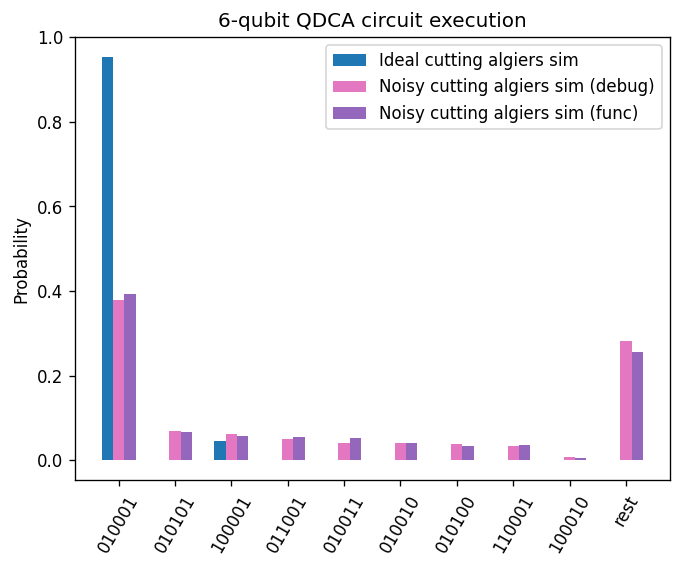

In [28]:
plot_dist(
    [ideal_algiers_sim_recon_dist, temp_reconstructed_probabilities, noisy_algiers_sim_recon_dist],
    ['Ideal cutting algiers sim', 'Noisy cutting algiers sim (debug)', 'Noisy cutting algiers sim (func)']
)

# How many shots are sufficient?

In [40]:
def simulations(
    max_cuts,
    graphtype,
    circuit,
    subgraph_dict,
    cut_nodes,
    service,
    target_graph,
    G,
    cur_params,
    hot_nodes,
    active_mixers,
    num,
    savedate,
    save_memory=True,
    cuts=None,
):
    backend_names = ["ibmq_qasm_simulator"] * 2

    for shots in [100, 200, 400, 800, 1200, 2000, 4000]:
        ideal_options = Options(execution={"shots":shots})

        reconstructed_probabilities, cuts = remote_runtime.local_cut_sim_reconstruct(
            circuit,
            subgraph_dict,
            cut_nodes,
            ideal_options,
            backend_names,
            service,
            num_threads=4,
            skip_cut=False,
        )

        computed_metrics, exact_probabilities = verify(circuit, reconstructed_probabilities)

        # save results
        if save_memory:
            savedict = {
                'graphfile':target_graph,
                'max_cuts': max_cuts,
                'shots':shots,
                'params': list(cur_params),
                'subgraph_dict': subgraph_dict,
                'cut_nodes': cut_nodes,
                'hot_nodes': hot_nodes,
                'active_mixers': active_mixers,
                'metrics': computed_metrics,
                'total_num_qubits': circuit.num_qubits,
                'max_subcircuit_width': cuts['max_subcircuit_width'],
                'num_cuts': cuts['num_cuts'],
            }
            
            fname = (
                f'runtime_results/ideal_shot_varying_simulations/'
                f'ideal-sim_18-nodes_{graphtype}_{max_cuts}-cuts_{shots}-shots_{savedate}-2023_{num}.json'
            )
            with open(fname, 'w') as outfile:
                json.dump(savedict, outfile, indent=1)
                            
        else:
            fname = (
                f'runtime_results/ideal_shot_varying_simulations/{folder}/'
                f'ideal-sim_18-nodes_{graphtype}_{max_cuts}-cuts_{shots}-shots_{savedate}-2023.pickle'
            )
            with open(fname, 'wb') as pklfile:
                data_dict = {
                    'graphfile': target_graph,
                    'G': G,
                    'max_cuts': max_cuts,
                    'shots':shots,
                    'params': cur_params,
                    'circuit': circuit,
                    'subgraph_dict': subgraph_dict,
                    'cut_nodes': cut_nodes,
                    'hot_nodes': hot_nodes,
                    'active_mixers': active_mixers,
                    'reconstructed_probs': reconstructed_probabilities,
                    'cuts': cuts,
                    'metrics': metrics,
                    'exact_probs': exact_probabilities,
                }
                pickle.dump(data_dict, pklfile)

In [20]:
def get_subcirc_vertices(circuit, cut_nodes, subgraph_dict):
    stripped_circ = wire_cutting._circuit_stripping(circuit=circuit)
    _, _, _, id_vertices = wire_cutting._read_circuit(circuit=stripped_circ)

    # The subcircuit qubit information is contained in the subgraph dict
    def parse_gate_info(gate_info):
        qubits = []
        for substr in gate_info.split('['):
            if ']' in substr:
                qubits.append(int(substr.split(']')[0]))
        return qubits

    # Hardcoded to 2 subcircuits only
    qdca_subcircuit_2q_gates = [[], []]
    for vertex_id, gate_info in id_vertices.items():
        for qubit in parse_gate_info(gate_info):
            if qubit not in cut_nodes:
                subcircuit_id = subgraph_dict[qubit]
                break
        qdca_subcircuit_2q_gates[subcircuit_id].append(vertex_id)
        
    return qdca_subcircuit_2q_gates

## 18-node graphs

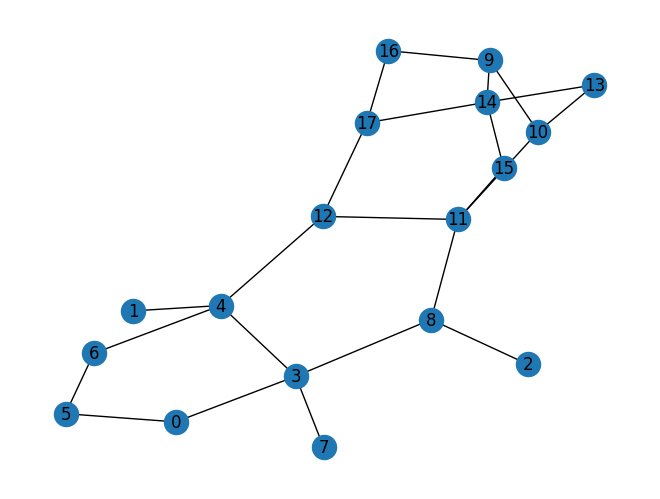

In [12]:
optimal_params = False
graphtype = '2community'
savedate = '04-01'
target_graph = (
    "/Users/teague/Workspace/dqva-and-circuit-cutting/"
    "benchmark_graphs/N18_com2_pin20_pout2_graphs/G10.txt"
)
G = qcopt.graph_funcs.graph_from_file(target_graph)
#target_graph = 'custom_barbell'
#G = nx.Graph()
#G.add_edges_from([(0,1), (1,2), (0,2), (2,3), (3,4), (4,5), (3,5)])
nx.draw_spring(G, with_labels=True)

### 1 Cut

#### Circuit generation

In [30]:
max_cuts = 1
params = None

circuit, subgraph_dict, cut_nodes, hot_nodes, active_mixers = runtime_helpers.get_circuit_from_graph(
    G,
    max_cuts,
    params,
    barriers=0,
    decompose_level=2
)
print(subgraph_dict)
print(active_mixers)
print(cut_nodes)
print(hot_nodes)
print(circuit.count_ops())
circuit = qiskit.compiler.transpile(circuit, optimization_level=3)
print(circuit.count_ops())
#circuit.draw(fold=-1)

{9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}
[9, 10, 13, 14, 15, 16, 17, 0, 1, 2, 3, 5, 6, 7, 11]
[8, 11, 4, 12]
[11]
OrderedDict([('u1', 390), ('cx', 378), ('u3', 192), ('u2', 192)])
OrderedDict([('cx', 378), ('u3', 267), ('u1', 216), ('u2', 21)])


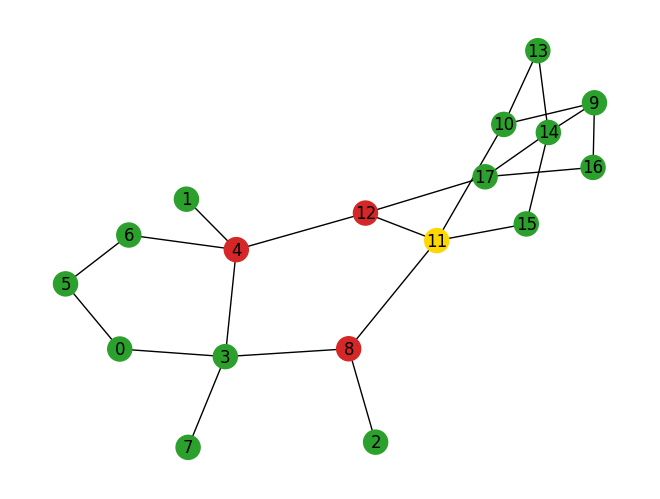

In [31]:
node_color = ['tab:green' if node in active_mixers else 'tab:red' for node in sorted(G.nodes)]
for node in hot_nodes:
    node_color[node] = 'gold'
nx.draw_spring(G, with_labels=True, node_color=[node_color[node] for node in G.nodes])

In [36]:
%%capture
# Make sure correct number of cuts are present
subcirc_vertices = get_subcirc_vertices(
    circuit,
    cut_nodes,
    subgraph_dict,
)
cuts = wire_cutting.cut_circuit_wires(
    circuit,
    method='manual',
    subcircuit_vertices=subcirc_vertices,
)

In [37]:
print(cuts.keys())
prntstr = (f'Cut {circuit.num_qubits}-qubit QDCA circuit into {len(cuts["subcircuits"])} subcircuits'
           f' with max {cuts["max_subcircuit_width"]}-qubits using {cuts["num_cuts"]} total cuts')
print(prntstr)

dict_keys(['max_subcircuit_width', 'subcircuits', 'complete_path_map', 'num_cuts', 'counter', 'classical_cost'])
Cut 18-qubit QDCA circuit into 2 subcircuits with max 10-qubits using 1 total cuts


#### Simulation

In [41]:
%%capture
for num in range(1, 11):
    if optimal_params:
        # Optimal parameters
        out = runtime_helpers.optimize_circuit(circuit)
        print(out)
        cur_params = out.x
    else:
        cur_params = np.random.uniform(0, 2*np.pi, size=len(circuit.parameters))
        
    temp_circuit = circuit.bind_parameters(cur_params)
    
    # serialize and save circuit
    qpyfile = (
        f'runtime_results/ideal_shot_varying_simulations/'
        f'ideal-sim_18-nodes_{graphtype}_{max_cuts}-cuts_{savedate}-2023_{num}.qpy'
    )
    with open(qpyfile, 'wb') as fd:
        qpy.dump(temp_circuit, fd)
    
    simulations(
        max_cuts=max_cuts,
        graphtype=graphtype,
        circuit=temp_circuit,
        subgraph_dict=subgraph_dict, 
        cut_nodes=cut_nodes,
        service=service,
        target_graph=target_graph,
        G=G,
        cur_params=cur_params,
        hot_nodes=hot_nodes,
        active_mixers=active_mixers,
        num=num,
        save_memory=True,
        savedate=savedate,
    )

### 2 Cuts

#### Circuit generation

In [50]:
max_cuts = 2
params = None

circuit, subgraph_dict, cut_nodes, hot_nodes, active_mixers = runtime_helpers.get_circuit_from_graph(
    G,
    max_cuts,
    params,
    barriers=0,
    decompose_level=2
)
print(subgraph_dict)
print(active_mixers)
print(cut_nodes)
print(hot_nodes)
print(circuit.count_ops())
circuit = qiskit.compiler.transpile(circuit, optimization_level=3)
print(circuit.count_ops())
#circuit.draw(fold=-1)

{9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1}
[9, 10, 13, 14, 15, 16, 17, 0, 1, 2, 3, 5, 6, 7, 8, 11]
[8, 11, 4, 12]
[8, 11]
OrderedDict([('cx', 406), ('u1', 392), ('u3', 230), ('u2', 196)])
OrderedDict([('cx', 406), ('u3', 301), ('u1', 215), ('u2', 22)])


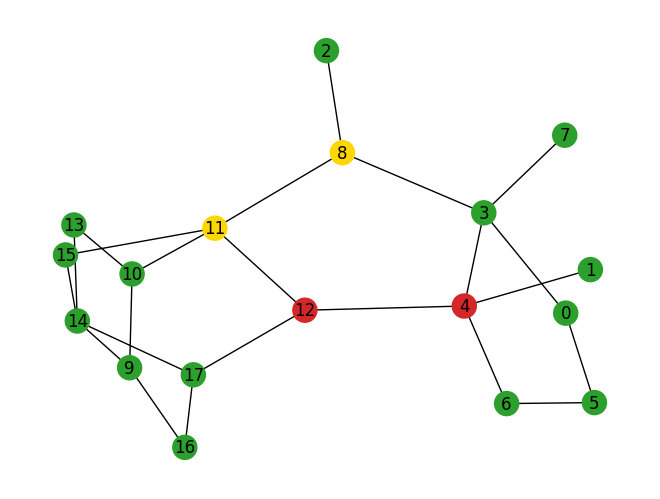

In [51]:
node_color = ['tab:green' if node in active_mixers else 'tab:red' for node in sorted(G.nodes)]
for node in hot_nodes:
    node_color[node] = 'gold'
nx.draw_spring(G, with_labels=True, node_color=[node_color[node] for node in G.nodes])

In [52]:
%%capture
# Make sure correct number of cuts are present
subcirc_vertices = get_subcirc_vertices(
    circuit,
    cut_nodes,
    subgraph_dict,
)
cuts = wire_cutting.cut_circuit_wires(
    circuit,
    method='manual',
    subcircuit_vertices=subcirc_vertices,
)

In [53]:
print(cuts.keys())
prntstr = (f'Cut {circuit.num_qubits}-qubit QDCA circuit into {len(cuts["subcircuits"])} subcircuits'
           f' with max {cuts["max_subcircuit_width"]}-qubits using {cuts["num_cuts"]} total cuts')
print(prntstr)

dict_keys(['max_subcircuit_width', 'subcircuits', 'complete_path_map', 'num_cuts', 'counter', 'classical_cost'])
Cut 18-qubit QDCA circuit into 2 subcircuits with max 10-qubits using 2 total cuts


#### Simulation

In [54]:
%%capture
for num in range(1, 11):
    if optimal_params:
        # Optimal parameters
        out = runtime_helpers.optimize_circuit(circuit)
        print(out)
        cur_params = out.x
    else:
        cur_params = np.random.uniform(0, 2*np.pi, size=len(circuit.parameters))
        
    temp_circuit = circuit.bind_parameters(cur_params)
    
    # serialize and save circuit
    qpyfile = (
        f'runtime_results/ideal_shot_varying_simulations/'
        f'ideal-sim_18-nodes_{graphtype}_{max_cuts}-cuts_{savedate}-2023_{num}.qpy'
    )
    with open(qpyfile, 'wb') as fd:
        qpy.dump(temp_circuit, fd)
    
    simulations(
        max_cuts=max_cuts,
        graphtype=graphtype,
        circuit=temp_circuit,
        subgraph_dict=subgraph_dict, 
        cut_nodes=cut_nodes,
        service=service,
        target_graph=target_graph,
        G=G,
        cur_params=cur_params,
        hot_nodes=hot_nodes,
        active_mixers=active_mixers,
        num=num,
        save_memory=True,
        savedate=savedate,
    )

### 3 Cuts

#### Circuit generation

In [105]:
max_cuts = 3
params = None

circuit, subgraph_dict, cut_nodes, hot_nodes, active_mixers = runtime_helpers.get_circuit_from_graph(
    G,
    max_cuts,
    params,
    barriers=0,
    decompose_level=2
)
print(subgraph_dict)
print(active_mixers)
print(cut_nodes)
print(hot_nodes)
print(circuit.count_ops())
circuit = qiskit.compiler.transpile(circuit, optimization_level=3)
print(circuit.count_ops())
#circuit.draw(fold=-1)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1}
[0, 1, 2, 3, 5, 6, 7, 9, 10, 13, 14, 15, 16, 17, 8, 11, 4]
[8, 11, 4, 12]
[8, 11, 4]
OrderedDict([('u1', 480), ('cx', 478), ('u2', 248), ('u3', 240)])
OrderedDict([('cx', 478), ('u3', 341), ('u1', 257), ('u2', 24)])


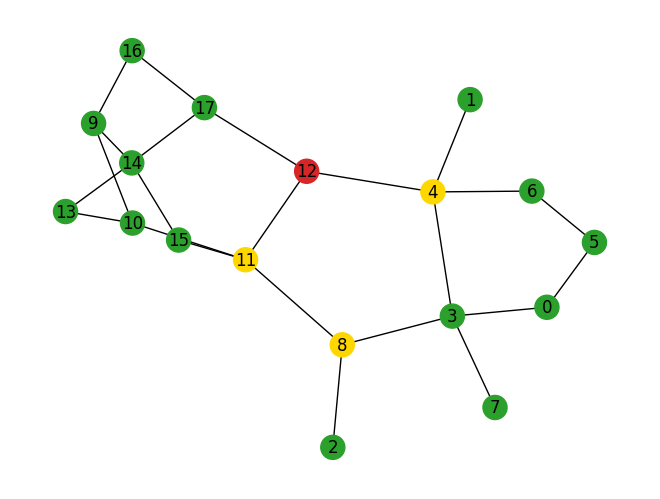

In [106]:
node_color = ['tab:green' if node in active_mixers else 'tab:red' for node in sorted(G.nodes)]
for node in hot_nodes:
    node_color[node] = 'gold'
nx.draw_spring(G, with_labels=True, node_color=[node_color[node] for node in G.nodes])

In [107]:
%%capture
# Make sure correct number of cuts are present
subcirc_vertices = get_subcirc_vertices(
    circuit,
    cut_nodes,
    subgraph_dict,
)
cuts = wire_cutting.cut_circuit_wires(
    circuit,
    method='manual',
    subcircuit_vertices=subcirc_vertices,
)

In [108]:
print(cuts.keys())
prntstr = (f'Cut {circuit.num_qubits}-qubit QDCA circuit into {len(cuts["subcircuits"])} subcircuits'
           f' with max {cuts["max_subcircuit_width"]}-qubits using {cuts["num_cuts"]} total cuts')
print(prntstr)

dict_keys(['max_subcircuit_width', 'subcircuits', 'complete_path_map', 'num_cuts', 'counter', 'classical_cost'])
Cut 18-qubit QDCA circuit into 2 subcircuits with max 11-qubits using 3 total cuts


#### Simulation

In [109]:
%%capture
for num in range(1, 11):
    if optimal_params:
        # Optimal parameters
        out = runtime_helpers.optimize_circuit(circuit)
        print(out)
        cur_params = out.x
    else:
        cur_params = np.random.uniform(0, 2*np.pi, size=len(circuit.parameters))
        
    temp_circuit = circuit.bind_parameters(cur_params)
    
    # serialize and save circuit
    qpyfile = (
        f'runtime_results/ideal_shot_varying_simulations/'
        f'ideal-sim_18-nodes_{graphtype}_{max_cuts}-cuts_{savedate}-2023_{num}.qpy'
    )
    with open(qpyfile, 'wb') as fd:
        qpy.dump(temp_circuit, fd)
    
    simulations(
        max_cuts=max_cuts,
        graphtype=graphtype,
        circuit=temp_circuit,
        subgraph_dict=subgraph_dict, 
        cut_nodes=cut_nodes,
        service=service,
        target_graph=target_graph,
        G=G,
        cur_params=cur_params,
        hot_nodes=hot_nodes,
        active_mixers=active_mixers,
        num=num,
        save_memory=True,
        savedate=savedate,
    )

## Plot results

In [110]:
# Load data
cur_metric = 'chi2'
shot_metric_data = {}
for cutval in [1,2,3]:
    shot_metric_data[cutval] = []
    for shotval in [100, 200, 400, 800, 1200, 2000, 4000]:
        cur_shot_data = []
        jsonfiles = glob.glob(f'runtime_results/ideal_shot_varying_simulations/*{cutval}-cuts_{shotval}-shots_{savedate}*.json')
        for jf in jsonfiles:
            with open(jf, 'r') as my_json_file:
                data = json.load(my_json_file)
            cur_shot_data.append(data['metrics']['nearest'][cur_metric])
        
        # Loaded all trials at this shot value, now average
        mean_val = np.mean(cur_shot_data)
        stdv_val = np.std(cur_shot_data)
        #mean_val = cur_shot_data[3]
        
        shot_metric_data[cutval].append((shotval, mean_val, stdv_val))

shot_metric_data

{1: [(100, 0.21589945453380333, 0.0886286191950908),
  (200, 0.13339958021332027, 0.05755380745613705),
  (400, 0.07772271075467782, 0.03180342176125883),
  (800, 0.04098396353077249, 0.012531806027571195),
  (1200, 0.029161605073574143, 0.009418397804267986),
  (2000, 0.01766464594110783, 0.004844122167144811),
  (4000, 0.010721389539384151, 0.003054927164162851)],
 2: [(100, 0.3163686038169018, 0.06583833916039784),
  (200, 0.18333617343681036, 0.05746284864492394),
  (400, 0.10506710714445681, 0.024264149241925208),
  (800, 0.0649274644305134, 0.01654422515791844),
  (1200, 0.043292323923798934, 0.008766068369423424),
  (2000, 0.028294382448600823, 0.008378554114352427),
  (4000, 0.016189373436149863, 0.003808765623365153)],
 3: [(100, 0.4735070599323885, 0.11169938831425737),
  (200, 0.30170971574413274, 0.06311339960547506),
  (400, 0.18147075649052954, 0.03344107905654282),
  (800, 0.10574544394229453, 0.026678851278031133),
  (1200, 0.07075825581221437, 0.01801221339926261),
  (

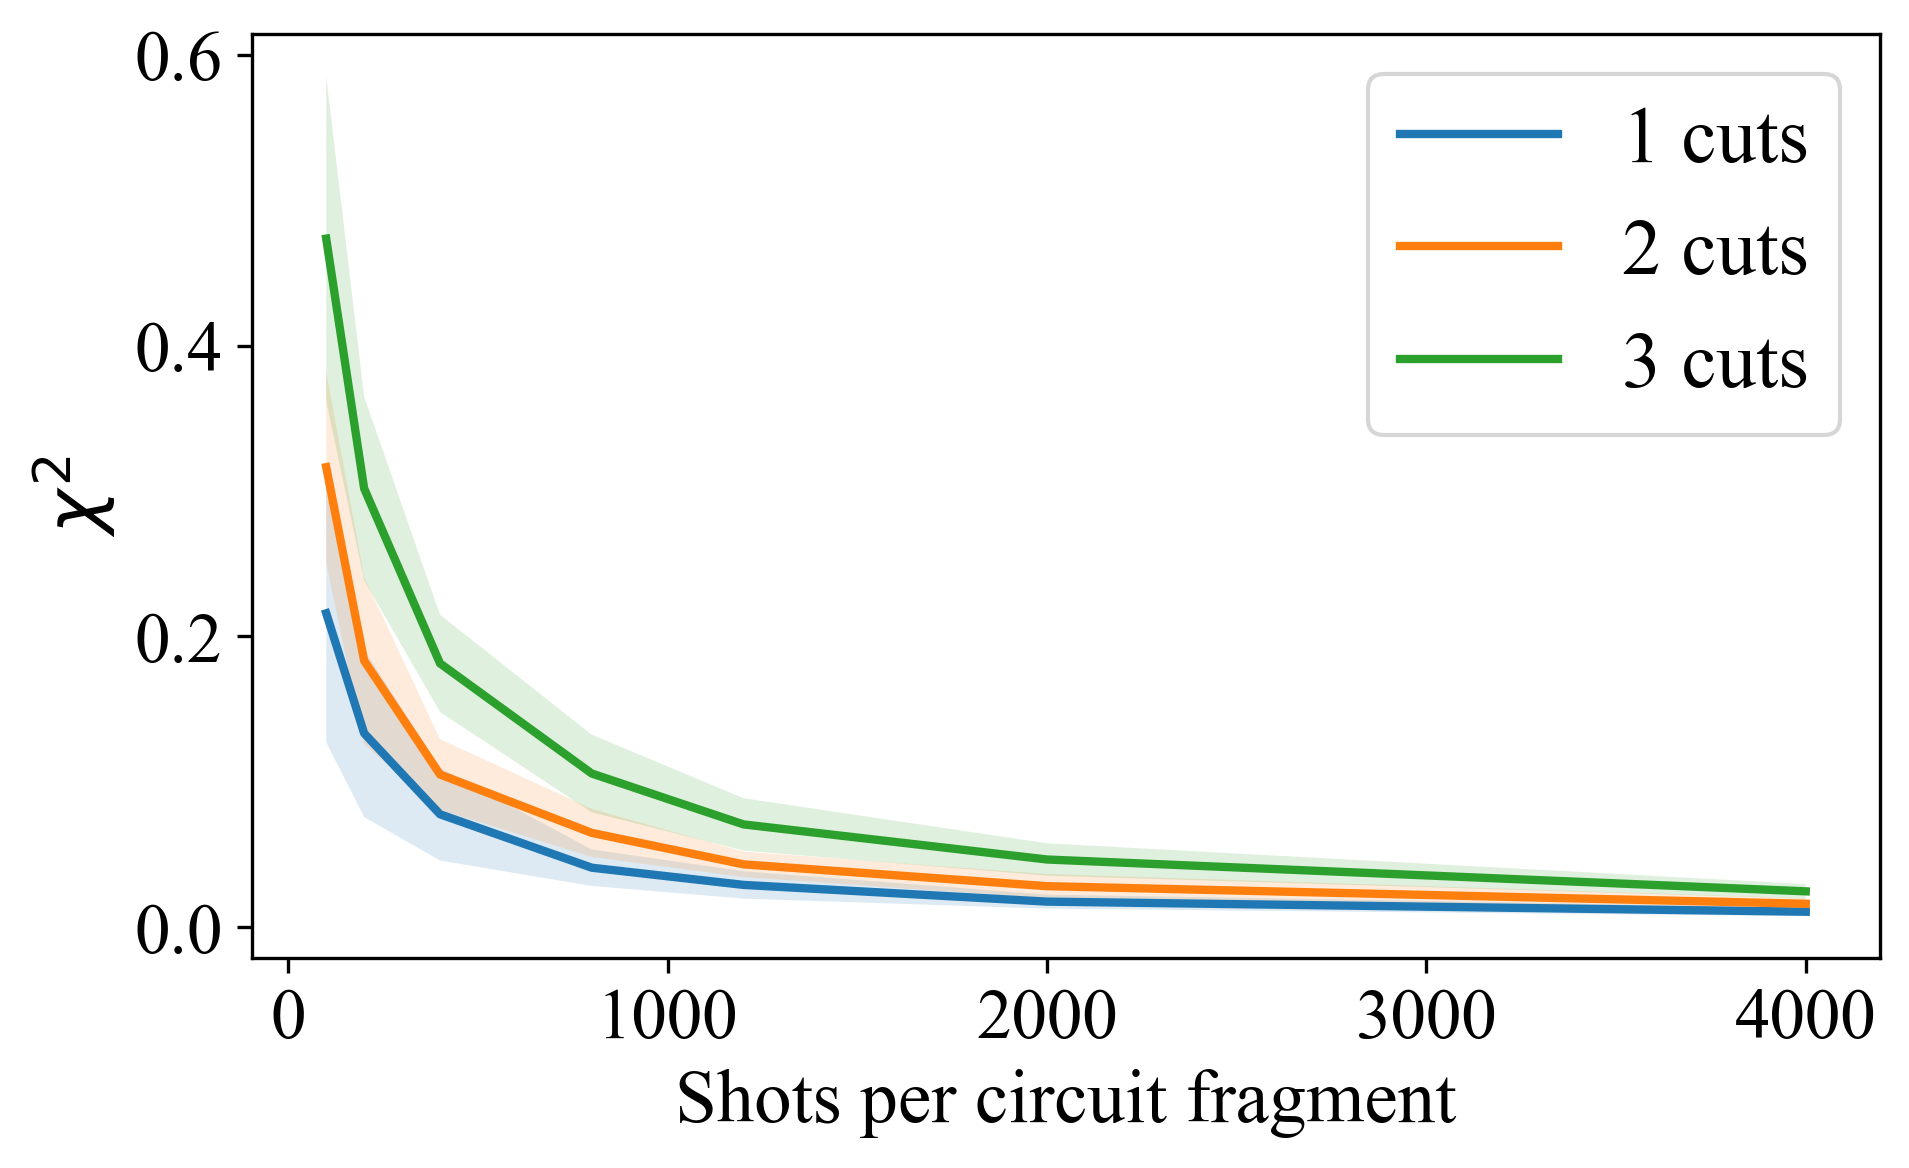

In [128]:
fig, ax = plt.subplots(dpi=300, figsize=[7,4])

for ncuts in [1,2,3]:
    cut_data = shot_metric_data[ncuts]
    x_vals = [t[0] for t in cut_data]
    y_vals = [t[1] for t in cut_data]
    std_vals = [t[2] for t in cut_data]
    upper_bound = [mean + std_dev for mean, std_dev in zip(y_vals, std_vals)]
    lower_bound = [mean - std_dev for mean, std_dev in zip(y_vals, std_vals)]
    ax.errorbar(x_vals, y_vals, label=f'{ncuts} cuts', lw=2)
    upper = [y-stdval for y, stdval in zip(y_vals, std_vals)]
    lower = [y+stdval for y, stdval in zip(y_vals, std_vals)]
    plt.fill_between(x_vals, upper, lower, alpha=0.15)

fs=18
ax.set_ylabel(r'$\chi^2$', fontsize=fs)
ax.set_xlabel('Shots per circuit fragment', fontsize=fs)
#ax.set_title('18-qubit QDCA circuit', fontsize=fs)
ax.legend(fontsize=fs+1)
ax.tick_params(axis='both', labelsize=fs-1)

plt.savefig('figures/chi-square_18node_results.pdf', bbox_inches='tight')

# Evaluation on `ibm_algiers`

In [5]:
algiers_service = QiskitRuntimeService(
    channel="ibm_cloud",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/37803d76ada74566b6f0114bd5964846:d9a0fc42-0d7f-4bbf-9320-dff97f3c8ed8::"
)
print(algiers_service.backends())
print(algiers_service.programs())

[<IBMBackend('ibm_algiers')>, <IBMBackend('ibm_canberra')>, <IBMBackend('ibmq_qasm_simulator')>, <IBMBackend('simulator_stabilizer')>, <IBMBackend('simulator_mps')>, <IBMBackend('simulator_extended_stabilizer')>, <IBMBackend('simulator_statevector')>]
[<RuntimeProgram('hello-world')>, <RuntimeProgram('sampler')>, <RuntimeProgram('estimator')>]


In [25]:
transpile_options = TranspilationOptions(layout_method='sabre', routing_method='sabre')
#simulator_options = SimulatorOptions(
#    noise_model=my_noise_models.get_pauli_noise_func(p_Xerr=0.001, p_Zerr=0.001, p_Yerr=0.001),
#    coupling_map=config.coupling_map,
#    basis_gates=config.basis_gates,
#)
algiers_options = Options(
    execution={"shots":shots},
    optimization_level=3,
    transpilation=transpile_options,
    simulator=simulator_options
)

In [26]:
num_threads = 2
backend_names = ['ibm_algiers'] * 2

noisy_algiers_sim_recon_dist, _ = remote_runtime.local_cut_sim_reconstruct(
    circuit,
    subgraph_dict,
    cut_nodes,
    algiers_options,
    backend_names,
    service,
    num_threads,
)

--------------------
subcircuit 0
ρ qubits = 0, O qubits = 1, width = 3, effective = 2, depth = 48, size = 65
     ┌───────────┐                                                             »
q_0: ┤ U3(π,0,π) ├──────────────────────────────────────────────────────────■──»
     └┬─────────┬┘┌──────────────────────────┐┌─────────┐┌───┐┌──────────┐┌─┴─┐»
q_1: ─┤ U1(π/2) ├─┤ U3(1.33357583688876,0,0) ├┤ U2(0,π) ├┤ X ├┤ U1(-π/4) ├┤ X ├»
     ┌┴─────────┴┐└──────────────────────────┘└─────────┘└─┬─┘└──────────┘└───┘»
q_2: ┤ U3(π,0,π) ├─────────────────────────────────────────■───────────────────»
     └───────────┘                                                             »
«                                                              »
«q_0: ──────────────────────────────■───────────────────────■──»
«     ┌─────────┐┌───┐┌──────────┐┌─┴─┐┌─────────────────┐  │  »
«q_1: ┤ U1(π/4) ├┤ X ├┤ U1(-π/4) ├┤ X ├┤ U3(π/2,0,-3π/4) ├──┼──»
«     └─────────┘└─┬─┘├─────────┬┘└───┘└─────────────────┘┌─┴─┐

In [ ]:
# save results
with open(f'QCE2023/runtime_results/algiers-qpu_cuts_{shots}-shots_03-27-2023.pickle', 'wb') as pklfile:
    data_dict = {
        'graphfile': target_graph,
        'G': G,
        'max_cuts': max_cuts,
        'params': params,
        'circuit': circuit,
        'subgraph_dict': subgraph_dict,
        'cut_nodes': cut_nodes,
        'hot_nodes': hot_nodes,
        'active_mixers': active_mixers,
        'noise_model': noise_model,
        'reconstructed_probs': reconstructed_probabilities,
        'cuts': cuts,
        'metrics': metrics,
        'exact_probs': exact_probabilities
    }
    pickle.dump(data_dict, pklfile)